In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [2]:
df1=pd.read_csv('Data/Assignment_Test.csv')
df2=pd.read_csv('cleaned_dataset/cleaned_trian_data.csv')

In [3]:
df1.duplicated().sum()

0

In [4]:
common_columns = df1.columns.intersection(df2.columns)
common_columns

Index(['DEALER ID', 'Cibil Score', 'TOTAL ASSET COST', 'ASSET CTG',
       'ASSET MODEL NO', 'MARITAL STATUS', 'GENDER', 'ADDRESS TYPE',
       'EMPLOY CONSTITUTION', 'EMPLOYER TYPE', 'phone_digitalage'],
      dtype='object')

In [5]:
df1=df1[common_columns]
df1

,DEALER ID,Cibil Score,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,MARITAL STATUS,GENDER,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER TYPE,phone_digitalage
0,105615,757,95352.0,SCECA,143241,Married,Male,Self/Spouse Owned,SALARIED,SALARIED,676
1,91593,750,75371.0,MOECA,166536,Married,Male,Parental,SELF-EMPLOYED,SELF-EMPLOYED,897
2,74152,710,94983.0,SCECA,134123,Single,Male,Self/Spouse Owned,SELF-EMPLOYED,SELF-EMPLOYED,839
3,110164,695,NaN,NaN,143627,NaN,Male,NaN,NaN,NaN,2050
4,113037,NaN,90277.0,MCECA,143948,Single,Male,Parental,SELF-EMPLOYED,SELF-EMPLOYED,-1
...,...,...,...,...,...,...,...,...,...,...,...
1995,110697,734,89700.0,MCECA,138469,Single,Male,Parental,SELF-EMPLOYED,SELF-EMPLOYED,1998
1996,107225,727,98000.0,MCECA,180580,Married,Male,Self/Spouse Owned,SELF-EMPLOYED,SELF-EMPLOYED,277
1997,92743,675,NaN,NaN,143233,NaN,Male,NaN,NaN,NaN,540
1998,193608,741,87101.0,MCECA,140208,Married,Male,Self/Spouse Owned,SELF-EMPLOYED,SELF-EMPLOYED,1671


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DEALER ID            2000 non-null   int64  
 1   Cibil Score          1158 non-null   object 
 2   TOTAL ASSET COST     978 non-null    float64
 3   ASSET CTG            978 non-null    object 
 4   ASSET MODEL NO       2000 non-null   int64  
 5   MARITAL STATUS       1019 non-null   object 
 6   GENDER               2000 non-null   object 
 7   ADDRESS TYPE         1365 non-null   object 
 8   EMPLOY CONSTITUTION  1006 non-null   object 
 9   EMPLOYER TYPE        1006 non-null   object 
 10  phone_digitalage     2000 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 172.0+ KB


In [7]:
df1.isnull().sum()

DEALER ID                 0
Cibil Score             842
TOTAL ASSET COST       1022
ASSET CTG              1022
ASSET MODEL NO            0
MARITAL STATUS          981
GENDER                    0
ADDRESS TYPE            635
EMPLOY CONSTITUTION     994
EMPLOYER TYPE           994
phone_digitalage          0
dtype: int64

In [8]:
df1['Cibil Score'] = pd.to_numeric(df1['Cibil Score'], errors='coerce')  # Convert to numeric, coercing non-numeric values to NaN


In [9]:
# Separate object and numerical columns
categorical_cols = df1.select_dtypes(include='object').columns
numerical_cols = df1.select_dtypes(include='number').columns

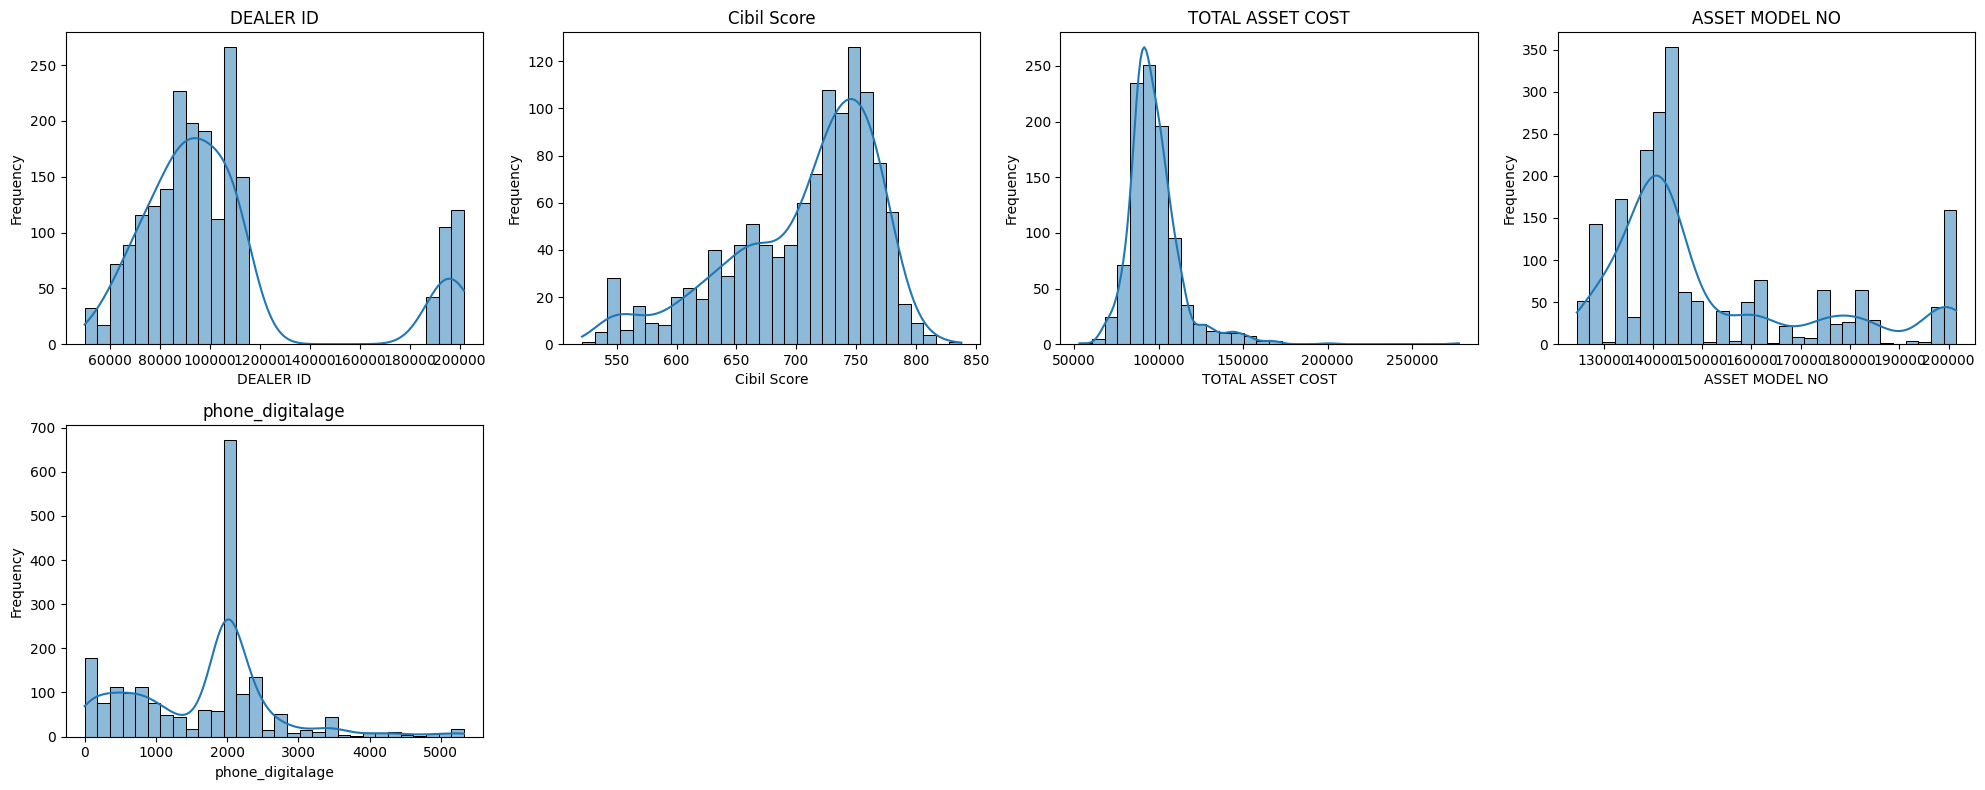

In [10]:

# Number of columns for the subplots
num_cols = 4

# Number of rows needed
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plot histograms and KDEs
for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df1[col], kde=True, ax=ax, bins=30, edgecolor='black')
    ax.set_title(f"{col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:

# Check value counts of object columns
for col in numerical_cols:
    print(f"Value counts of {col}:")
    print(df1[col].value_counts())
    print('*'*100)

Value counts of DEALER ID:
DEALER ID
112006    20
88282     18
73665     10
97418     10
94065     10
          ..
74368      1
113386     1
108147     1
55971      1
84909      1
Name: count, Length: 1145, dtype: int64
****************************************************************************************************
Value counts of Cibil Score:
Cibil Score
546.0    22
734.0    21
752.0    20
728.0    19
753.0    17
         ..
550.0     1
609.0     1
678.0     1
568.0     1
685.0     1
Name: count, Length: 222, dtype: int64
****************************************************************************************************
Value counts of TOTAL ASSET COST:
TOTAL ASSET COST
110500.0    4
86500.0     3
105927.0    3
93000.0     3
89000.0     3
           ..
99135.0     1
104632.0    1
90730.0     1
86584.0     1
92425.0     1
Name: count, Length: 907, dtype: int64
****************************************************************************************************
Value counts of ASSET

In [12]:
asset_cost_median=df1['TOTAL ASSET COST'].median()
cibil_median=df1['Cibil Score'].median()
cibil_median,asset_cost_median

(726.0, 94535.5)

In [13]:
df1['TOTAL ASSET COST'] = df1['TOTAL ASSET COST'].fillna(asset_cost_median)
df1['Cibil Score'] = df1['Cibil Score'].fillna(cibil_median)


In [14]:
for col in numerical_cols:
    unique_values = df1[col].dropna().unique()
    random_values = np.random.choice(unique_values, size=df1[col].isnull().sum())
    df1.loc[df1[col].isnull(), col] = random_values

In [15]:
df1[numerical_cols].isnull().sum()

DEALER ID           0
Cibil Score         0
TOTAL ASSET COST    0
ASSET MODEL NO      0
phone_digitalage    0
dtype: int64

In [16]:

# Check value counts of object columns
for col in categorical_cols:
    print(f"Value counts of {col}:")
    print(df1[col].value_counts())
    print('*'*100)

Value counts of ASSET CTG:
ASSET CTG
MCECA    373
SCECA    261
MCEXA    229
SCEXA     47
MCPRA     24
MCECB     12
MOECA     11
ESECB      9
MCEXB      5
MCECC      4
ESNRC      2
EMECA      1
Name: count, dtype: int64
****************************************************************************************************
Value counts of MARITAL STATUS:
MARITAL STATUS
Married    764
Single     255
Name: count, dtype: int64
****************************************************************************************************
Value counts of GENDER:
GENDER
Male      1672
Female     328
Name: count, dtype: int64
****************************************************************************************************
Value counts of ADDRESS TYPE:
ADDRESS TYPE
Self/Spouse Owned    477
RESIDENCE            453
Parental             346
Rented                85
Company Provided       2
OWNED-PENTHOUSE        1
OTHERS                 1
Name: count, dtype: int64
********************************************

In [17]:
df1[categorical_cols].isnull().sum()

ASSET CTG              1022
MARITAL STATUS          981
GENDER                    0
ADDRESS TYPE            635
EMPLOY CONSTITUTION     994
EMPLOYER TYPE           994
dtype: int64

In [18]:
for col in categorical_cols:
    unique_values = df1[col].dropna().unique()
    random_values = np.random.choice(unique_values, size=df1[col].isnull().sum())
    df1.loc[df1[col].isnull(), col] = random_values

In [19]:
df1[categorical_cols].isnull().sum()


ASSET CTG              0
MARITAL STATUS         0
GENDER                 0
ADDRESS TYPE           0
EMPLOY CONSTITUTION    0
EMPLOYER TYPE          0
dtype: int64

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DEALER ID            2000 non-null   int64  
 1   Cibil Score          2000 non-null   float64
 2   TOTAL ASSET COST     2000 non-null   float64
 3   ASSET CTG            2000 non-null   object 
 4   ASSET MODEL NO       2000 non-null   int64  
 5   MARITAL STATUS       2000 non-null   object 
 6   GENDER               2000 non-null   object 
 7   ADDRESS TYPE         2000 non-null   object 
 8   EMPLOY CONSTITUTION  2000 non-null   object 
 9   EMPLOYER TYPE        2000 non-null   object 
 10  phone_digitalage     2000 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 172.0+ KB


In [21]:
df1.to_csv('cleaned_dataset/cleaned_test_data.csv',index=False)